In [ ]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Pandas and NumPy  packages
import pandas as pd
import numpy as np

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix

#miscellaneous libraries
pd.set_option("display.max_colwidth",200)
pd.set_option("display.max_columns",None)

In [ ]:
# data set urls, move files to drive mount the drive, and give path - copy from the file properties
from google.colab import drive
drive.mount('/content/drive')
#application_data.csv
url_leads_data = '/content/drive/MyDrive/upgrad/Leads.csv'

#Read the data from csv using pandas
leads_df = pd.read_csv(url_leads_data)

In [ ]:
#Check the Shape of dataset
leads_df.shape

In [ ]:
#Check the columns of dataset
leads_df.columns

In [ ]:
leads_df.head(10)


In [ ]:
# Check the info to see the types of the feature variables and the null values present
leads_df.info()

In [ ]:
# Check summary of the dataset
leads_df.describe()

In [ ]:
#Data cleaning & preperation

In [ ]:
# Check: number of missing values by each column in ascending order
leads_df.isnull().sum().sort_values()

The presence of numerous columns with a substantial number of missing values is evident. It is apparent that these columns lack utility. Given our dataframe comprises 9000 datapoints, a decision has been made to remove columns with more than 3000 missing values, deeming them irrelevant to our analysis.

In [ ]:
# Drop the columns for which null count is greater than 3000
for col in leads_df.columns:
    if leads_df[col].isnull().sum()>3000:
        leads_df.drop(col, axis=1,inplace=True)

In [ ]:
leads.isnull().sum().sort_values()


In [ ]:
#check value counts for "Country"
leads_df['Country'].value_counts(dropna=False)

In [ ]:
# Highest number of leads from INDIA leads highest number of leads As we can infer, the variable "Country" holds no significance for our analysis. thus, we will drop it from our dataset.
# drop the "Country"
leads_df.drop(['Country'], axis = 1, inplace = True)

In [ ]:
#check value count of "City" column
leads_df['City'].value_counts(dropna=False)

Mumbai boasts the highest lead numbers.
As we can infer, the variable "City" holds no significance for our analysis. Thus we will drop it from our dataset.

In [ ]:
# drop the "City"
leads_df.drop(['City'], axis = 1, inplace = True)

In [ ]:
# Recheck the number of null
leads_df.isnull().sum().sort_values(ascending=False)

In [ ]:
#Check the % of missing values for all the columns
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

In [ ]:
#Lets Visualize features with Select values

In [ ]:
# check the counts of all the columns
for col in leads_df:
    print(leads_df[col].astype('category').value_counts())
    print('......')

In [ ]:
def countplot(col, fig):
    plt.title('Count across'+' '+ col, size = 14)
    plt.subplot(2,2, fig)
    plt.xticks(rotation = 90)
    plt.xlabel(col,size = 15)
    sns.countplot(data=leads_df,x=col)

plt.figure(figsize=(15,10))
countplot('How did you hear about X Education',1)
countplot('Specialization',3)
countplot('Lead Profile',2)

plt.tight_layout()


Some columns contain a level labeled 'Select,' indicating that the student did not choose a specific option for that particular column, resulting in the display of 'Select.' These instances are essentially equivalent to missing values. Therefore, it is imperative to determine the value counts of the 'Select' level in all the columns where it is present.

In [ ]:
#Features visualization

In [ ]:
def countplot(col, fig):
    plt.title('Count across'+' '+ col, size = 16)
    plt.subplot(4,2, fig)
    sns.countplot(data=leads_df, x=col)
    plt.xlabel(col,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,24))

countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()


Observing that the "Lead Profile" and "How did you hear about X Education" columns contain numerous rows with the value 'Select,' which adds no value to the analysis, it is recommended to drop these columns.

In [ ]:
# dropping Lead Profile and How did you hear about X Education cols
leads_df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)


Additionally, upon examining the value counts of all the columns, it became evident that certain columns predominantly contain a single value for all data points. These columns include "Do Not Call," "Search," "Magazine," "Newspaper Article," "X Education Forums," "Newspaper," "Digital Advertisement," "Through Recommendations," "Receive More Updates About Our Courses," "Update me on Supply Chain Content," "Get updates on DM Content," and "I agree to pay the amount through cheque." Given that the overwhelming majority of values for these variables are 'No,' it is advisable to drop these columns as they do not contribute meaningfully to our analysis.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads_df,diag_kind='kde')
plt.show()

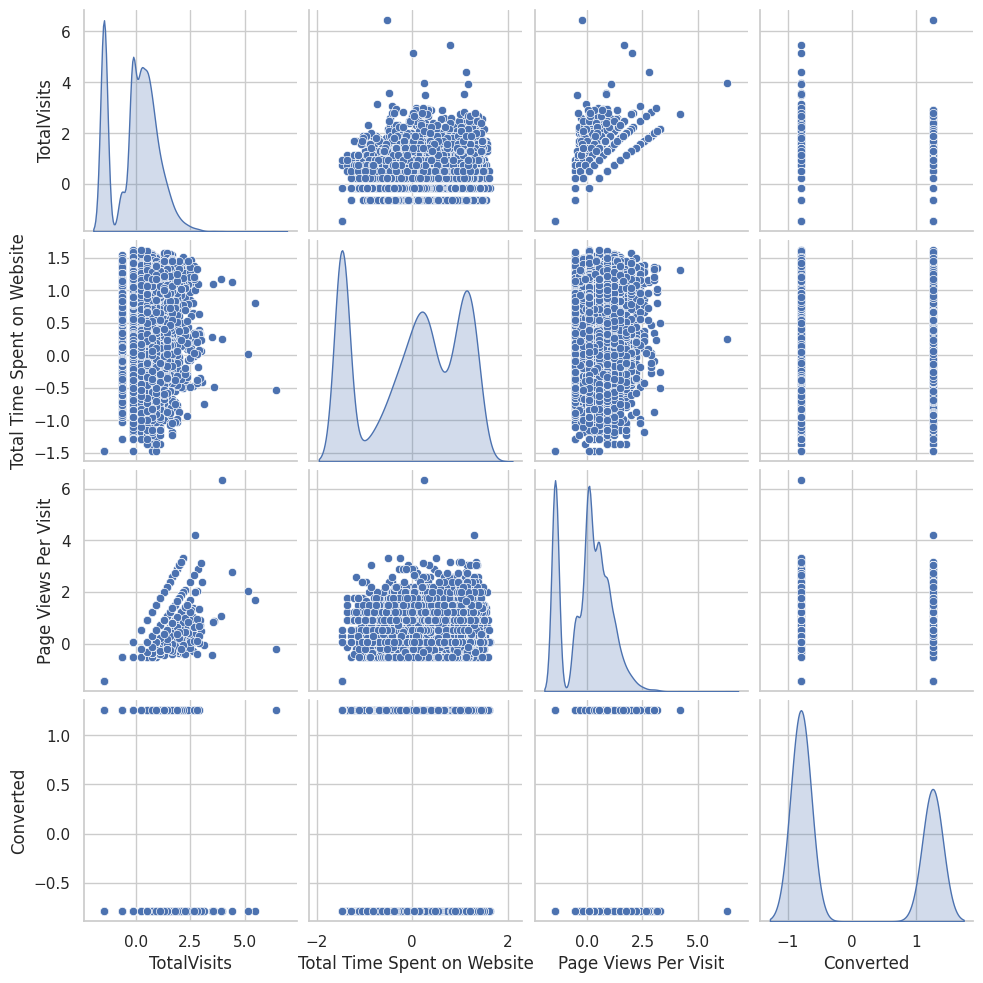

In [705]:
sns.pairplot(transformedx_edu,diag_kind='kde')
plt.show()

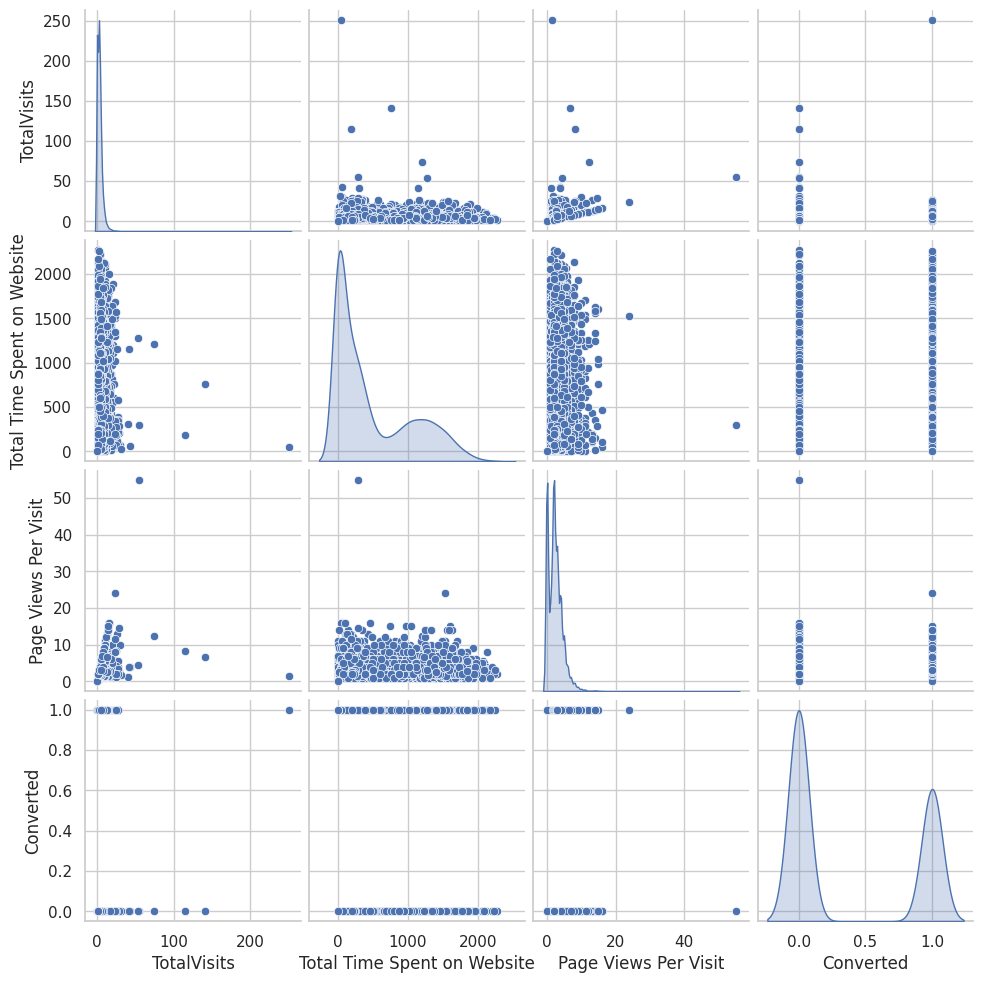

In [706]:
x_edu = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde')
plt.show()

In [707]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845
5,-1.457907,-1.473767,-1.454706,-0.791863
6,-0.141636,1.358834,0.065574,1.262845
7,-1.457907,-1.473767,-1.454706,-0.791863
8,-0.141636,-0.399638,0.065574,-0.791863
9,0.509319,-0.475473,0.901976,-0.791863


In [708]:
# Drop the following columns:
leads_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [709]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [710]:
# The variable "What matters most to you in choosing a course" is dominated by the level "Better Career Prospects," which appears 6528 times, while the other two levels occur only once, twice, and once, respectively. Consequently, it is recommended to drop this column, as it does not provide substantial variation for meaningful analysis.

In [711]:
leads_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [712]:
# Checking the number of null values again
leads_df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Given that the column "What is your current occupation" contains numerous null values, a decision has been made to retain the entire column rather than dropping it entirely. Instead, the null rows specifically within this column will be removed, allowing us to preserve potential significance in our analysis while addressing missing data in a targeted manner.

In [713]:
# Drop the null values rows in the column 'What is your current occupation'
leads_df = leads_df[~pd.isnull(leads_df['What is your current occupation'])]

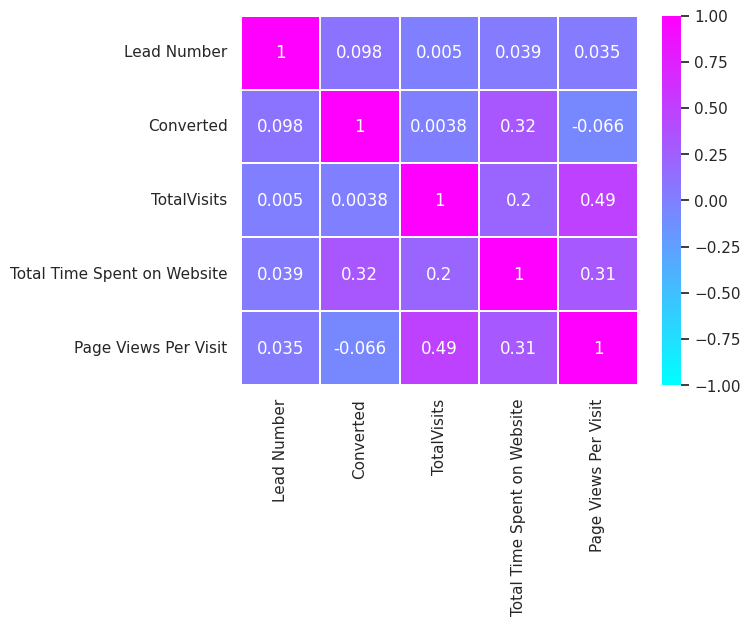

<Figure size 1200x900 with 0 Axes>

In [714]:
# Observe Correlation using heatmap
sns.heatmap(leads_df.corr(), annot=True,cmap="cool", vmin=-1,robust=True,linewidth=0.1 )
plt.figure(figsize=(12,9))
plt.show()

**Analysing Categorical features**

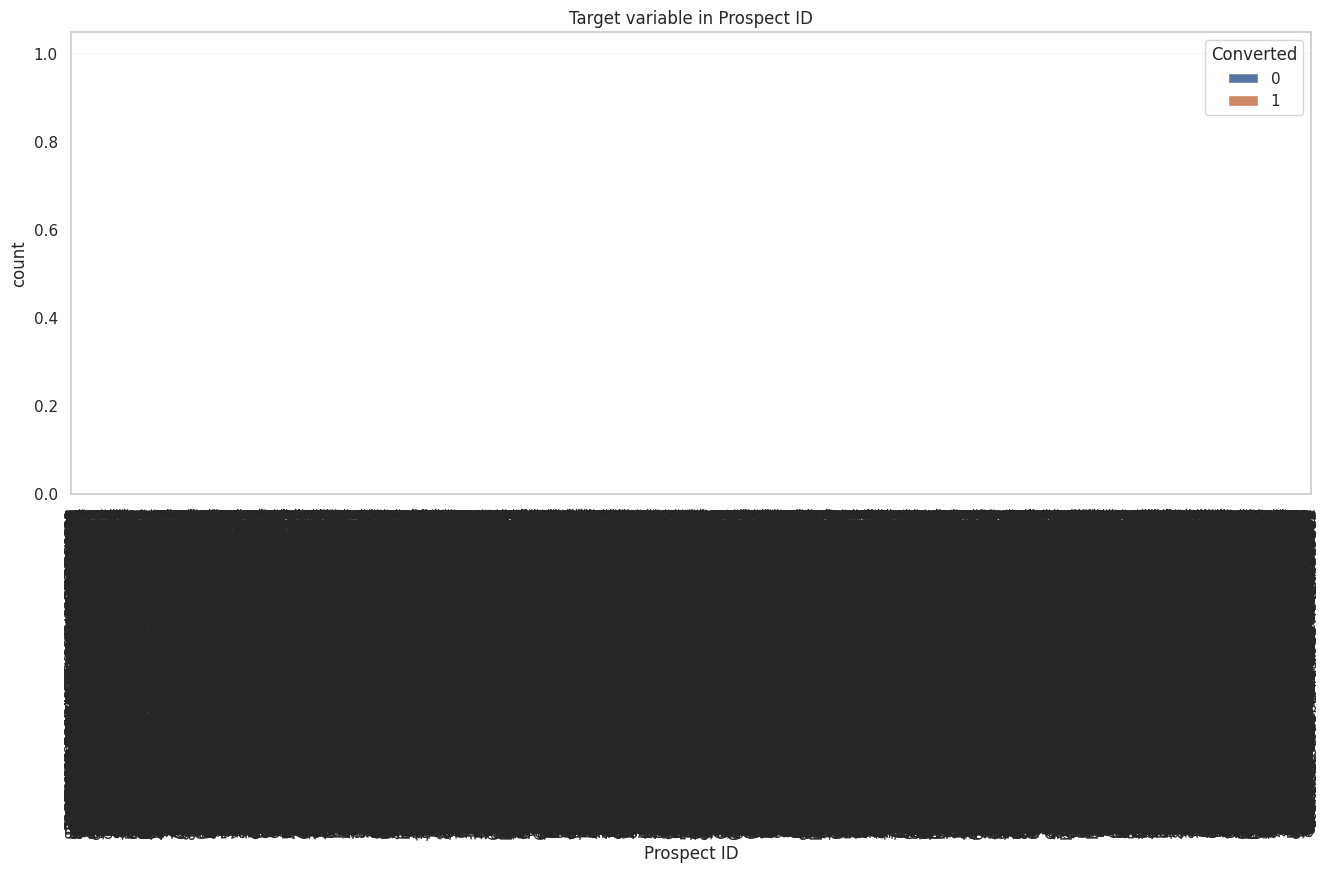

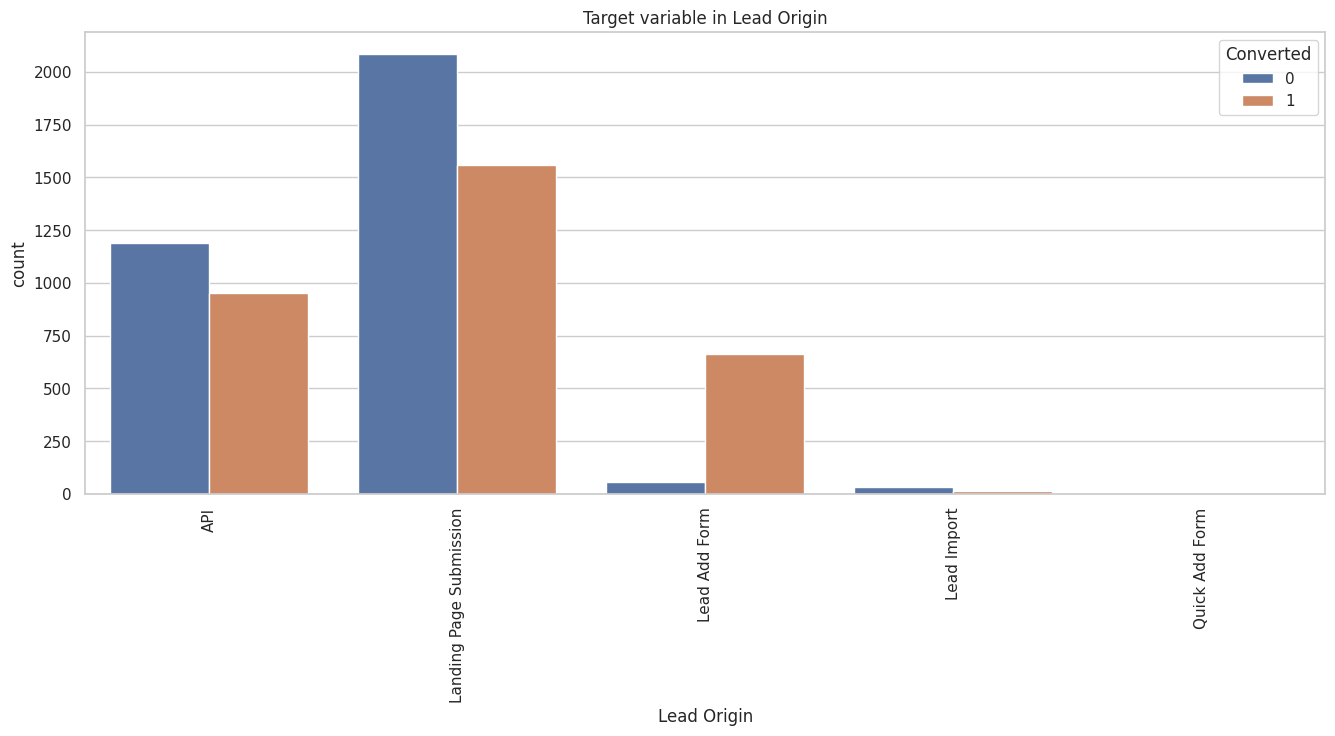

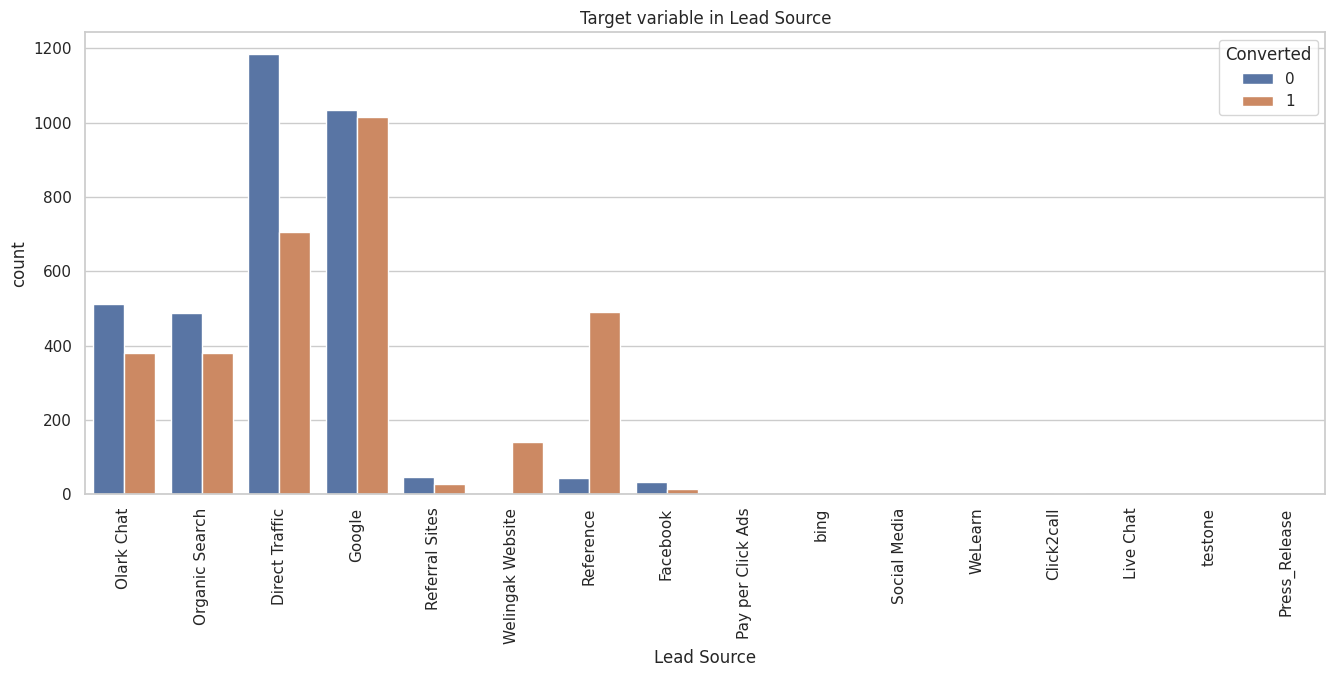

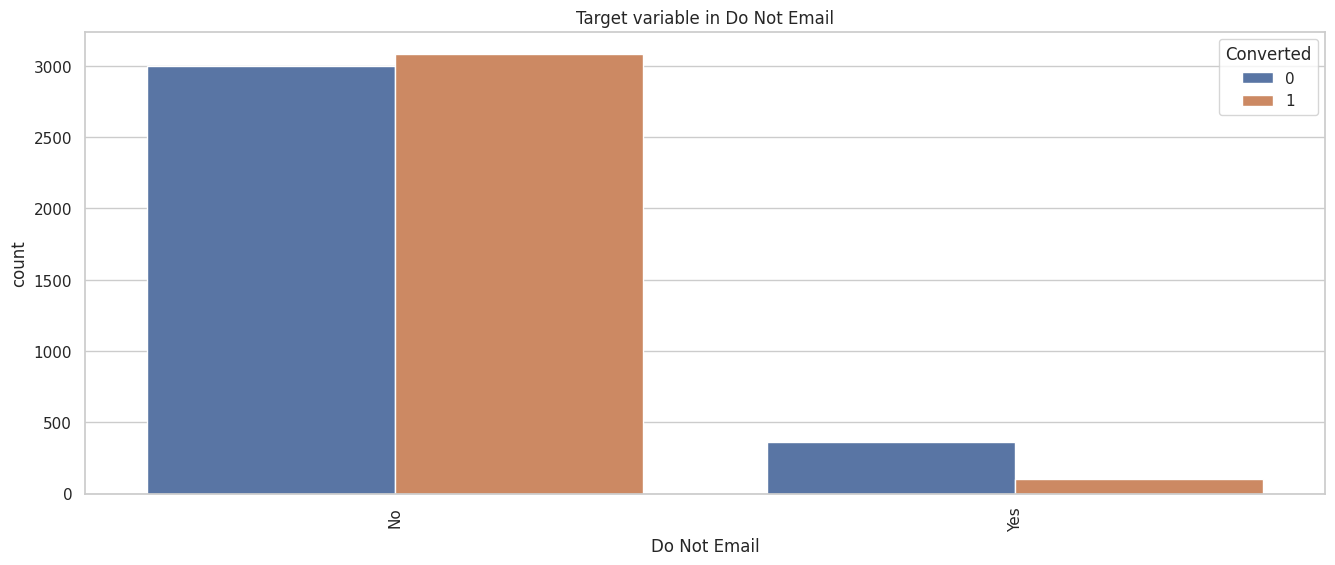

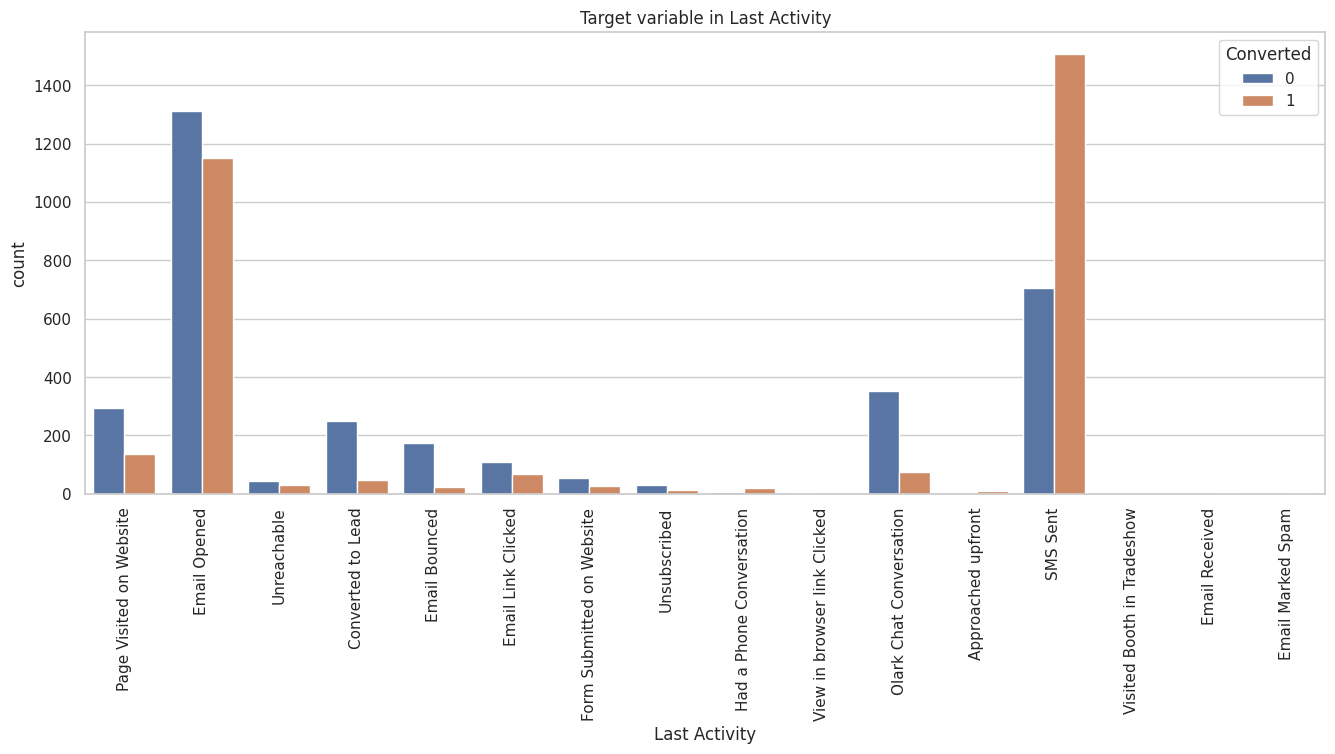

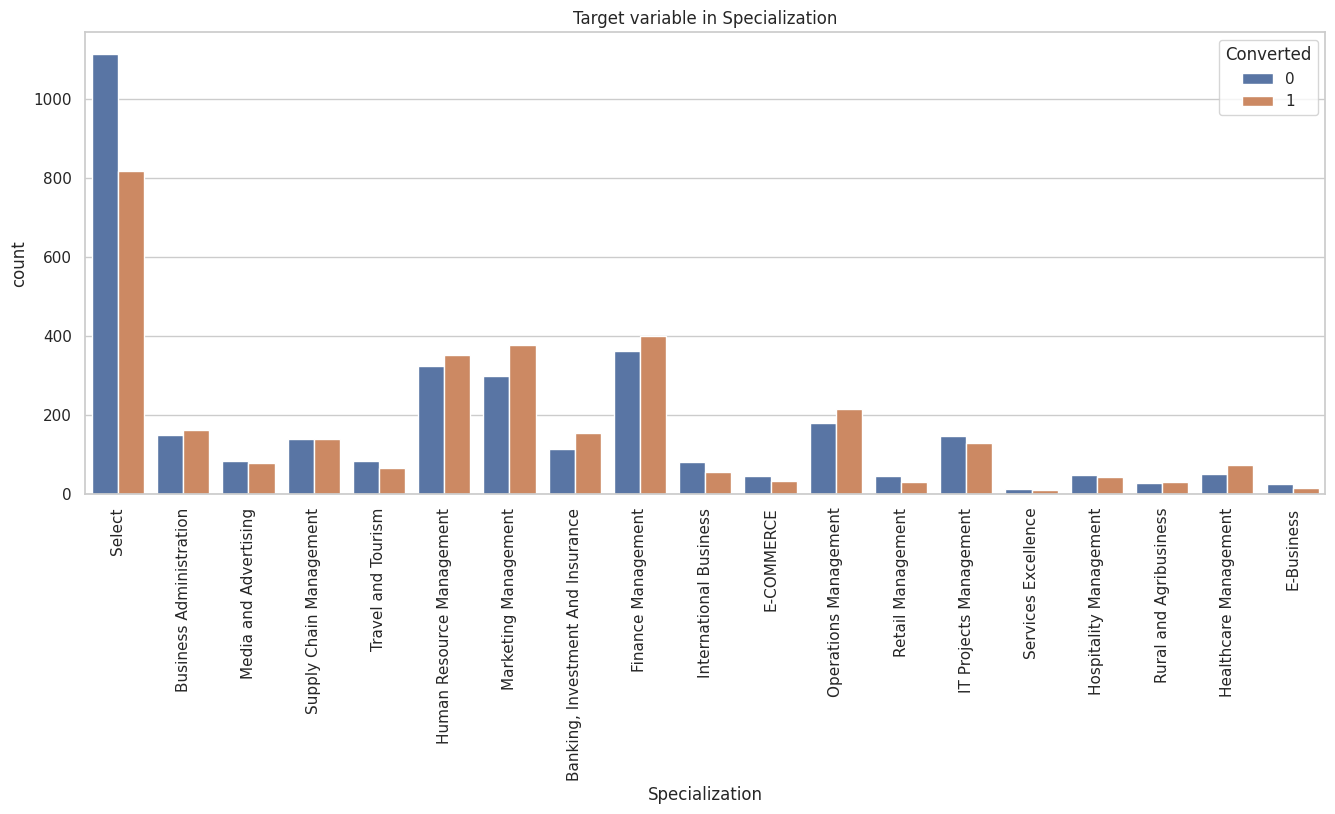

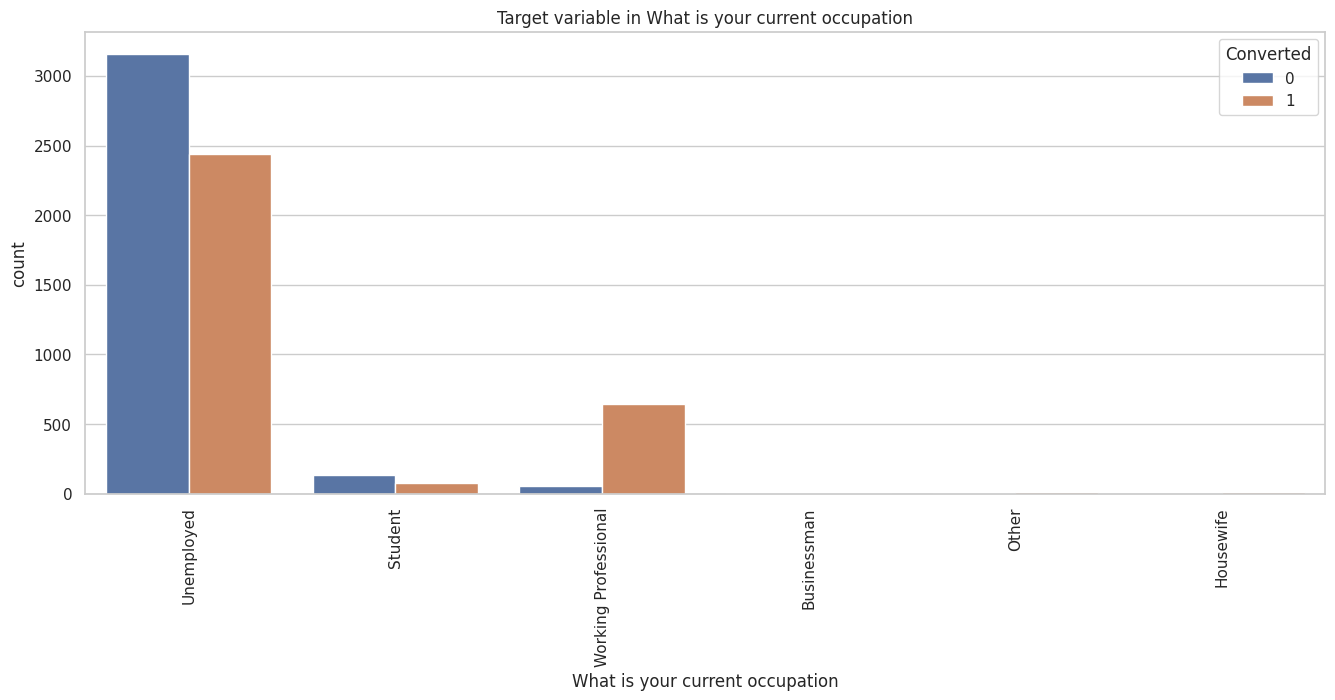

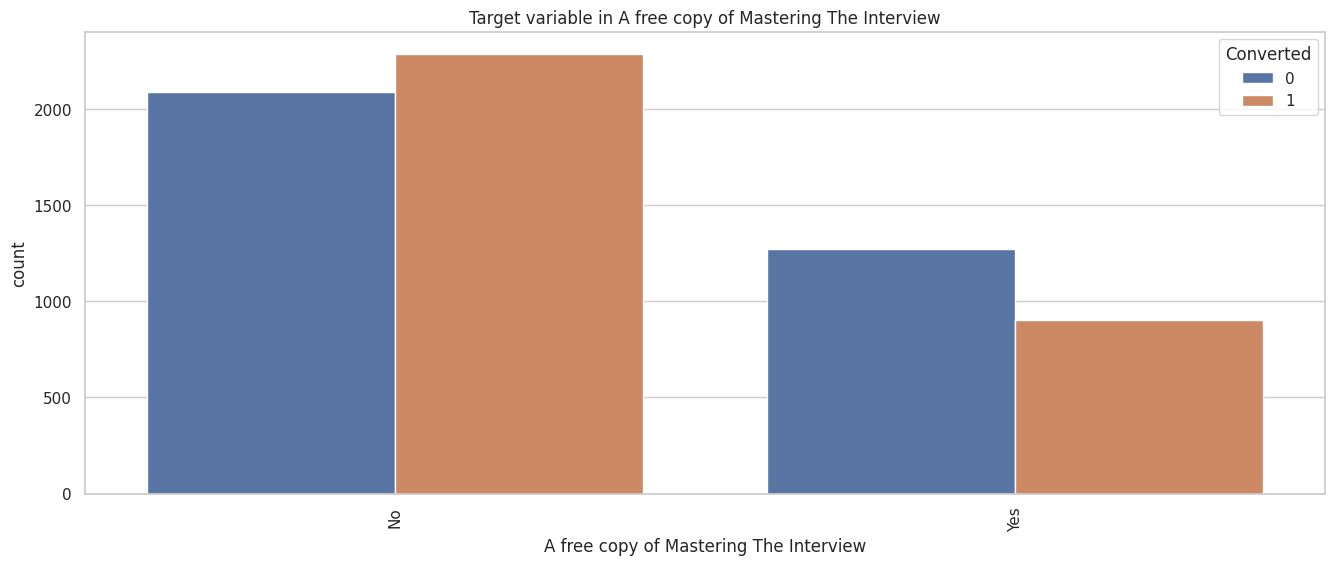

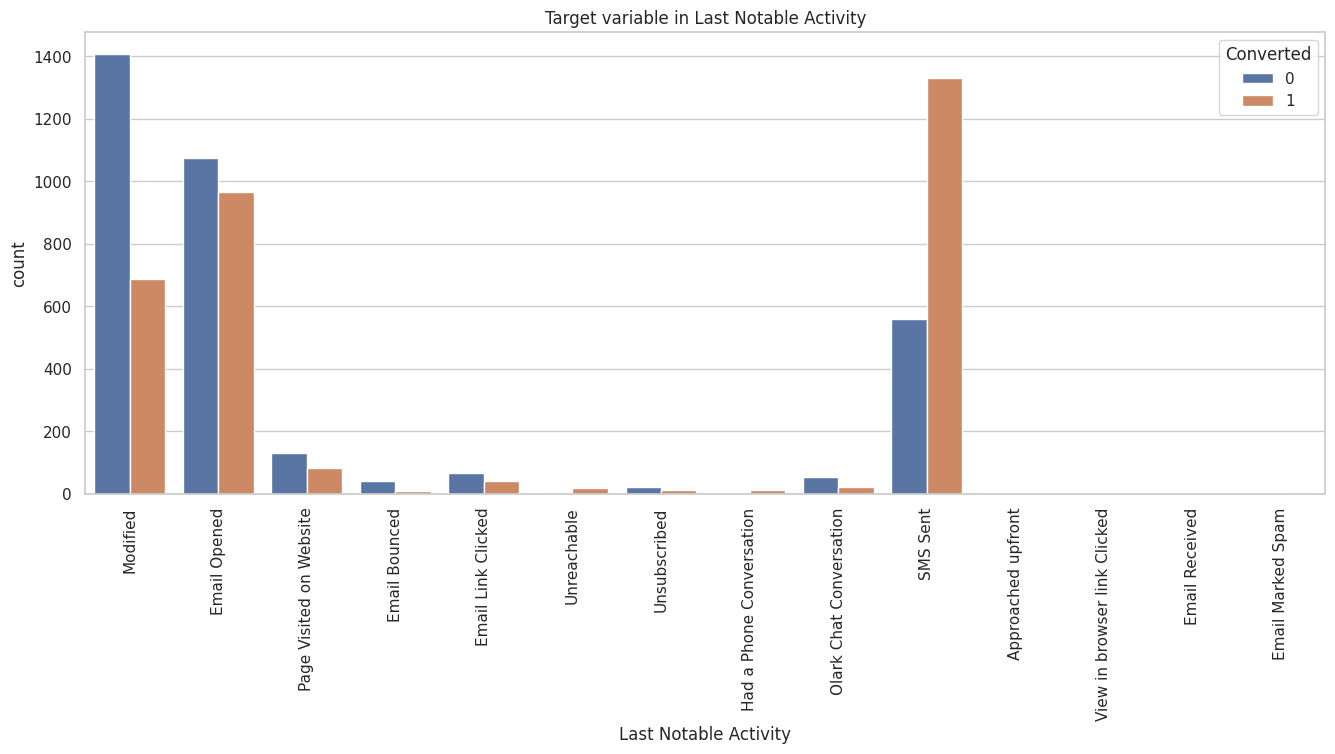

In [718]:
columns = leads_df.select_dtypes(include ="object").columns
for col in columns:
    plt.figure(figsize =(16,6))
    plt.title('Target variable in'+' '+ col)
    plt.xlabel(col)
    sns.countplot(hue=leads_df['Converted'], data=leads_df,x=col)
    plt.xticks(rotation = 90)
    plt.show()

In [720]:
# Recheck Check the number of null values
leads_df.isnull().sum().sort_values()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
Specialization                             18
Lead Source                                36
Last Activity                             103
TotalVisits                               130
Page Views Per Visit                      130
dtype: int64

In [721]:
# Dropping the null values rows in the columns: 'Specialization' 'TotalVisits' and 'Lead Source'
leads_df = leads_df[~pd.isnull(leads_df['Specialization'])]
leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]


In [722]:
# ReCheck the number of null values
leads_df.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

With the removal of null values from the dataset, it's crucial to assess the percentage of rows that have been retained post-cleaning.

In [723]:
print(len(leads_df.index))
print(len(leads_df.index)/9240)

6373
0.6897186147186147


Retaining approximately 69% of the rows post-cleaning signifies a substantial portion of the dataset, indicating that a considerable amount of information has been preserved for analysis.

In [724]:
# Recheck the dataset
leads_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,88867067-3750-4753-8d33-1c7d1db53b5e,660558,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


Certainly, the variables "Prospect ID" and "Lead Number" are deemed unnecessary for the analysis. Therefore, it is advisable to drop both of these variables from the dataset.

In [725]:
# Drop the "Prospect ID" and "Lead Number"
leads_df.drop(['Lead Number','Prospect ID' ], 1, inplace = True)

In [726]:
leads_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


Let's begin by identifying the categorical variables present in the dataset and subsequently creating dummy variables for them.

In [727]:
# Check the columns of type 'object'
temp = leads_df.loc[:, leads_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [728]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [729]:
pd.get_dummies(df,prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [730]:
# Create dummy variable using the 'get_dummies' command
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)
# Add results to master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [731]:
# Certainly, to address the issue of the 'Select' level in the 'Specialization' variable, we will create dummy variables while explicitly dropping the 'Select' level. This ensures that the analysis is not affected by irrelevant data.
dummy_spl = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads_df = pd.concat([leads_df, dummy_spl], axis = 1)

In [732]:
# Dropping the variables for which the dummy variables have been created
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview',
                          'Last Notable Activity'], 1)

In [733]:
# Recheck the dataset
leads_df.head(10)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,1,11.0,1538,11.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13,0,5.0,170,5.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,

next crucial step is to split the dataset into training and testing sets. This ensures that we can train our model on one subset of the data and evaluate its performance on another independent subset, thereby gauging its generalization capabilities.

In [734]:
# Importing the `train_test_split` library
# Put all the feature variables in X
X = leads_df.drop(['Converted'], 1)
X.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,8.0,1351,8.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,11.0,1538,11.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13,5.0,170,5.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [735]:
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [736]:
# Split the dataset into 70% train & 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [737]:
# check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


In [738]:
# Scaling
# This process ensures that all variables contribute uniformly to the model, preventing those with larger scales from dominating the others. Let's proceed with scaling the numeric variables in the dataset.

In [739]:
# Importing the 'MinMax scaler' Library
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]])
X_train.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0.019920,0.157570,0.312500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2044,0.007968,0.163292,0.125000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6411,0.019920,0.566901,0.078125,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6498,0.007968,0.242077,0.125000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [740]:
# Check the correlations using heatmap
# As the no. of variables are high, it's better to look at the table instead of plotting a heatmap

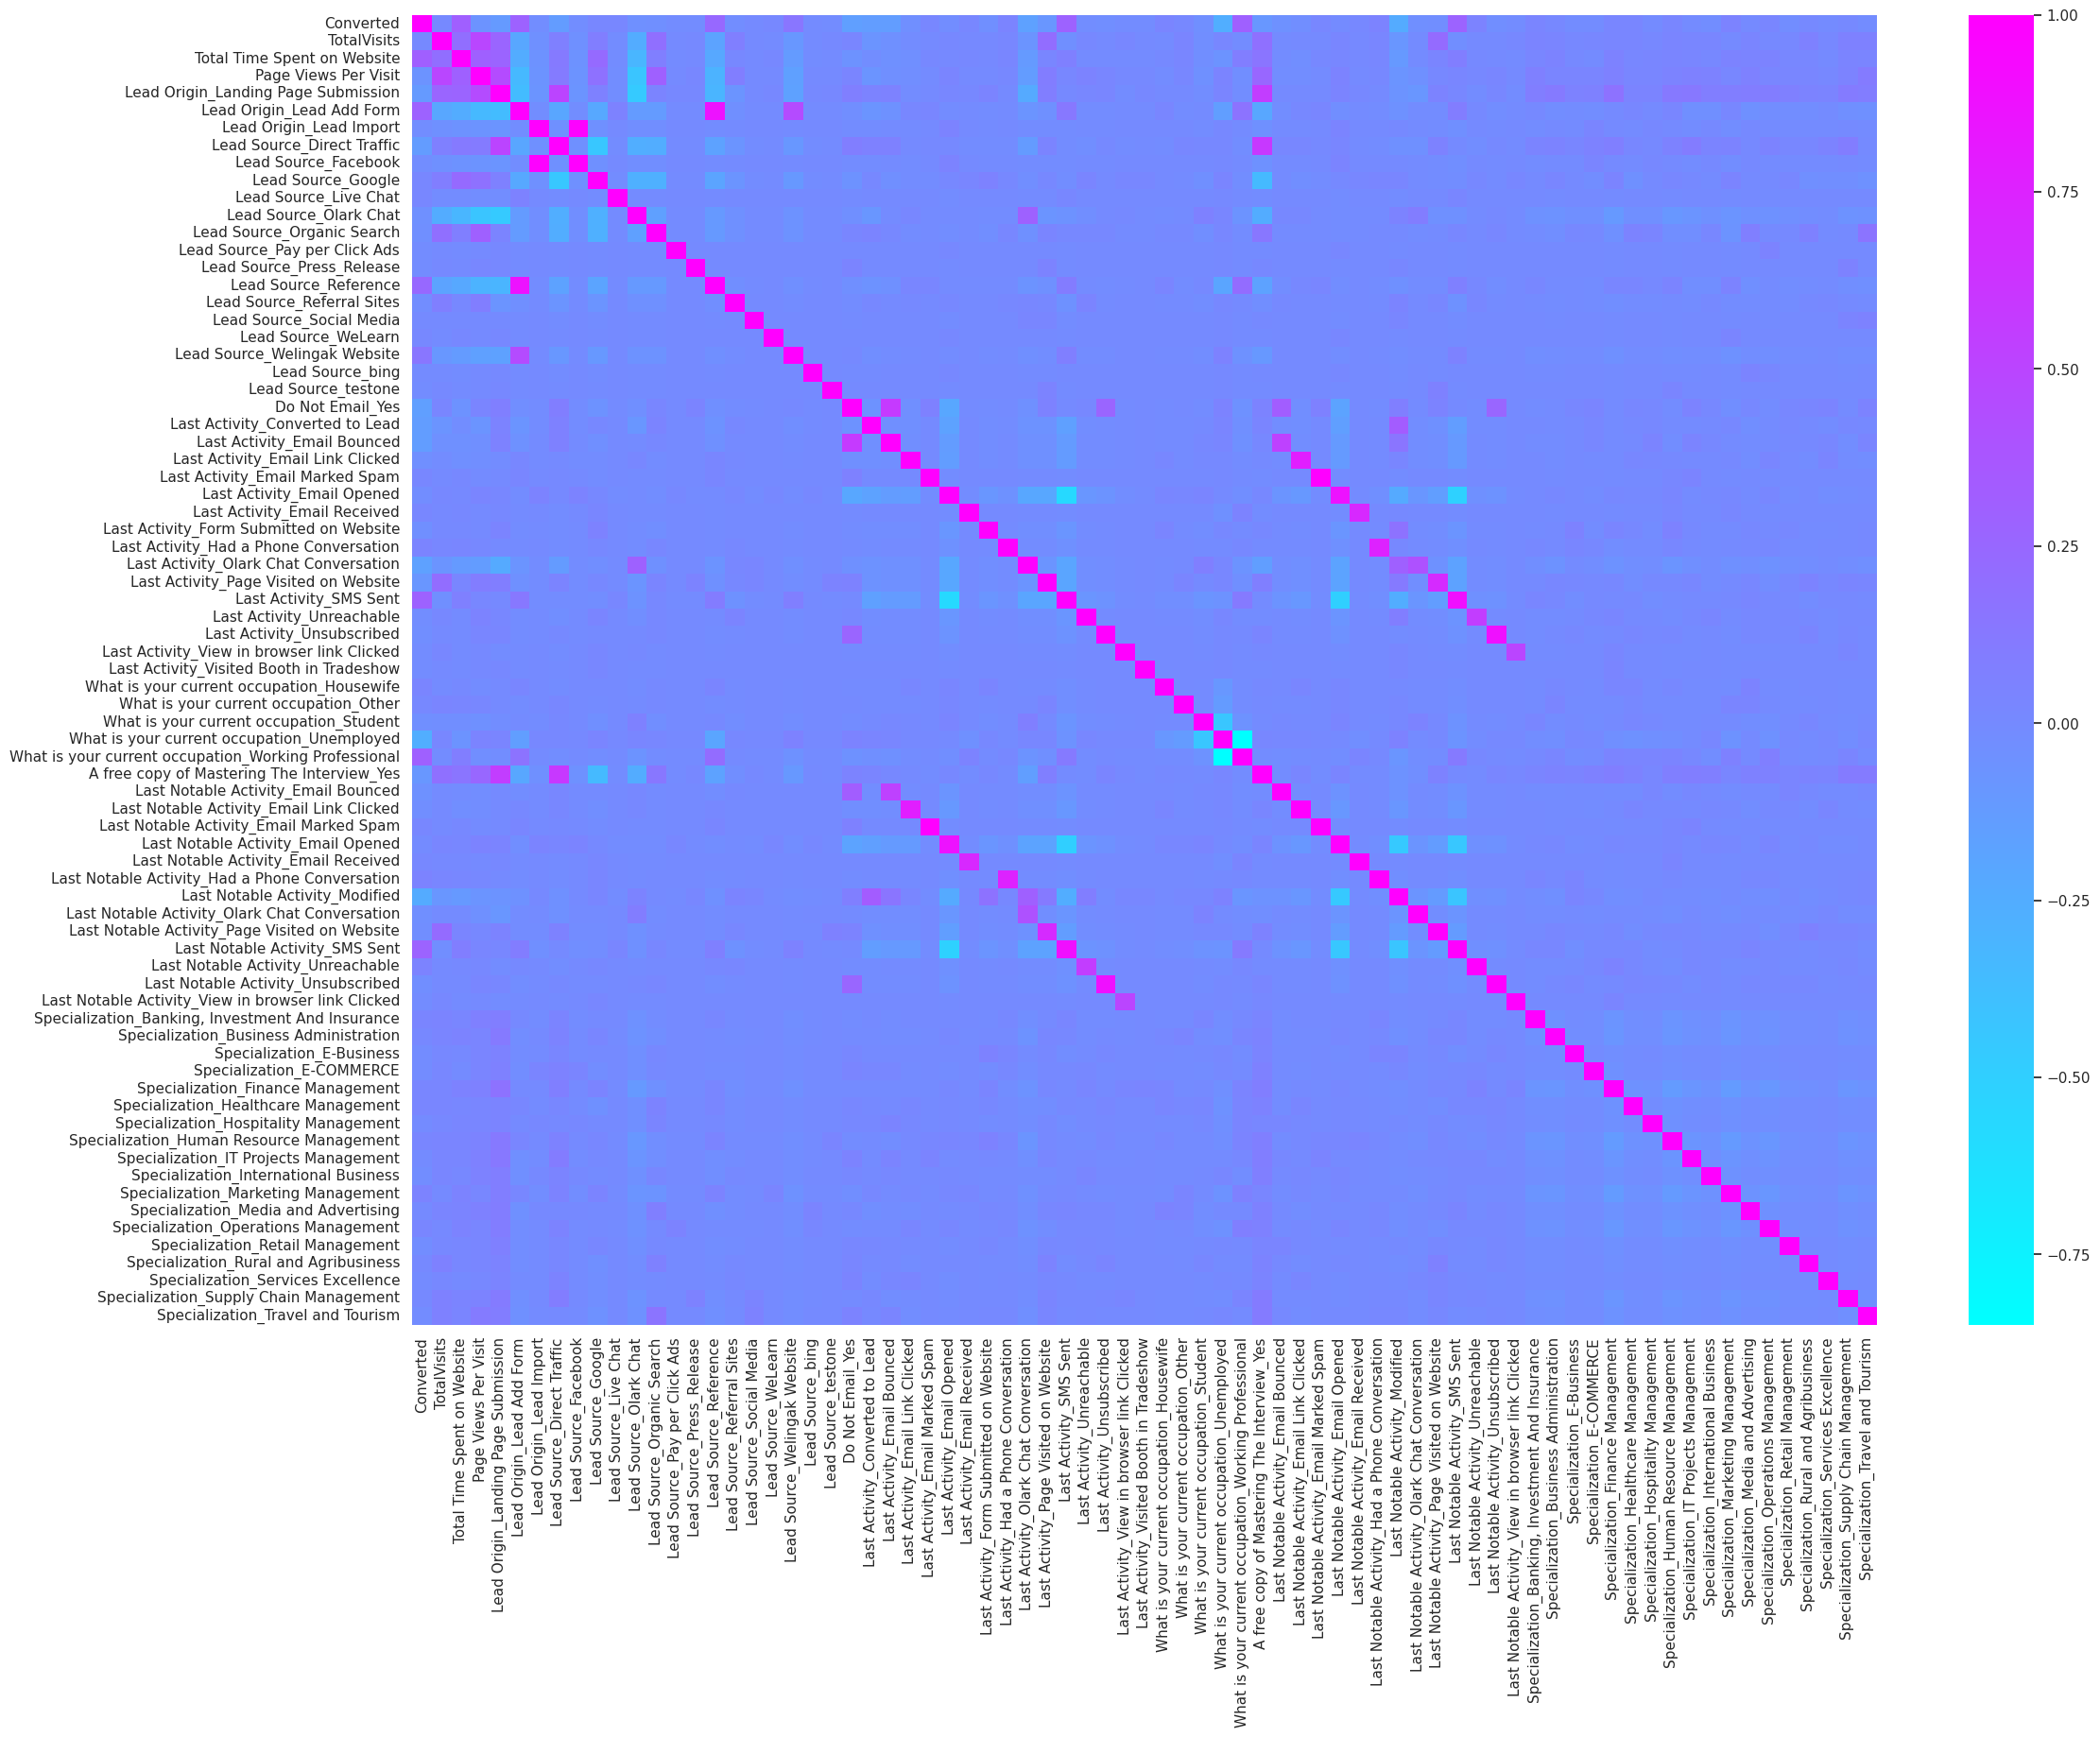

In [741]:
plt.figure(figsize = (25,18))
sns.heatmap(leads.corr(),cmap="cool")
plt.show()

**Model Building**
For effective model building, selecting a subset of features is a prudent approach, particularly when dealing with a large number of variables. Recursive Feature Elimination (RFE) is a powerful technique for this purpose. It helps identify the most significant features by iteratively fitting the model and eliminating the least important variables. This way, we can enhance the model's efficiency and interpretability. Let's proceed with RFE to select a meaningful set of features for our model.

In [742]:
# Import the 'LogisticRegression' and create LogisticRegression object
logreg = LogisticRegression()

In [743]:
# Import the 'RFE' & select 15 variables
# run RFE with 15 variables as output
rfe = RFE(logreg,step=15)
rfe = rfe.fit(X_train, y_train)

In [744]:
# Check the features that are selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),

In [745]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

leveraging the variables selected by Recursive Feature Elimination (RFE), we can now proceed to construct a logistic regression model using statsmodels. This step allows us to delve into the statistical aspects, including p-values and Variance Inflation Factors (VIFs), providing valuable insights into the significance and multicollinearity of the chosen variables. Let's embark on building the logistic regression model to further our analysis.

In [746]:
# Select the columns selected by RFE
X_train = X_train[col]

**Model 1**

In [747]:
# Import 'statsmodels'
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.9
Date:                Sun, 14 Jan 2024   Deviance:                       3957.8
Time:                        06:26:37   Pearson chi2:                 4.68e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4959      0.631     -0.786      0.432      -1.732       0.740
TotalVisits                                             12.8958      3.348      3.851      0.000       6.333      19.459
Total Time Spent on Website                              4.3832      0.189     23.160      0.000       4.012       4.754
Page Views Per Visit                                    -1.2260      0.455     -2.696      0.007      -2.117      -0.335
Lead Origin_Landing Page Submission                     -0.7950      0.123     -6.457      0.000      -1.036      -0.554
Lead Origin_Lead Add Form                                2.2182      1.172      1.892      0.058      -0.080       4.516
Lead Source_Olark Chat                                   1.1438      0.155      7.363      0.000       0.839       1.448
Lead Source_Reference                                    1.3148      1.193      1.102      0.270      -1.023       3.653
Lead Source_Welingak Website                             3.6811      1.542      2.387      0.017       0.659       6.703
Do Not Email_Yes                                        -1.3566      0.227     -5.966      0.000      -1.802      -0.911
Last Activity_Converted to Lead                         -0.5349      0.238     -2.250      0.024      -1.001      -0.069
Last Activity_Email Bounced                             -1.2784      0.674     -1.897      0.058      -2.599       0.042
Last Activity_Had a Phone Conversation                   1.3418      0.987      1.359      0.174      -0.593       3.277
Last Activity_Olark Chat Conversation                   -0.8223      0.201     -4.096      0.000      -1.216      -0.429
Last Activity_Page Visited on Website                   -0.3634      0.175     -2.072      0.038      -0.707      -0.020
Last Activity_SMS Sent                                   0.9465      0.090     10.485      0.000       0.770       1.123
What is your current occupation_Housewife               22.7588   2.37e+04      0.001      0.999   -4.64e+04    4.65e+04
What is your current occupation_Student                 -1.0434      0.655     -1.593      0.111      -2.327       0.241
What is your current occupation_Unemployed              -1.2139      0.615     -1.973      0.048      -2.420      -0.008
What is your current occupation_Working Professional     1.3469      0.644      2.090      0.037       0.084       2.610
Last Notable Activity_Email Bounced                      1.5722      0.807      1.948      0.051      -0.009       3.154
Last Notable Activity_Email Link Clicked                -0.5988      0.281     -2.130      0.033      -1.150      -0.048
Last Notable Activity_Had a Phone Conversation          22


Several variables exhibit p-values exceeding 0.05, necessitating attention. Before addressing this concern, it is essential to examine the Variance Inflation Factors (VIFs).

In [748]:
# Import the 'variance_inflation_factor'
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.71
6,Lead Source_Reference,65.38
7,Lead Source_Welingak Website,20.08
17,What is your current occupation_Unemployed,10.15
3,Lead Origin_Landing Page Submission,5.40
2,Page Views Per Visit,4.64
21,Last Notable Activity_Had a Phone Conversation,2.46
11,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.44
18,What is your current occupation_Working Professional,2.43


In [749]:
# VIFs look in a range except for three variables.
# Let's first drop the variable Lead Source_Reference as it has a high p-value & high VIF.
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [750]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.4
Date:                Sun, 14 Jan 2024   Deviance:                       3958.8
Time:                        06:26:39   Pearson chi2:                 4.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4954      0.631     -0.786      0.432      -1.731       0.740
TotalVisits                                             12.8947      3.348      3.851      0.000       6.332      19.458
Total Time Spent on Website                              4.3827      0.189     23.154      0.000       4.012       4.754
Page Views Per Visit                                    -1.2265      0.455     -2.697      0.007      -2.118      -0.335
Lead Origin_Landing Page Submission                     -0.7946      0.123     -6.454      0.000      -1.036      -0.553
Lead Origin_Lead Add Form                                3.4916      0.279     12.516      0.000       2.945       4.038
Lead Source_Olark Chat                                   1.1431      0.155      7.356      0.000       0.839       1.448
Lead Source_Welingak Website                             2.4069      1.038      2.318      0.020       0.372       4.442
Do Not Email_Yes                                        -1.3538      0.227     -5.961      0.000      -1.799      -0.909
Last Activity_Converted to Lead                         -0.5351      0.238     -2.251      0.024      -1.001      -0.069
Last Activity_Email Bounced                             -1.2812      0.674     -1.902      0.057      -2.602       0.039
Last Activity_Had a Phone Conversation                   1.3423      0.987      1.360      0.174      -0.593       3.277
Last Activity_Olark Chat Conversation                   -0.8221      0.201     -4.096      0.000      -1.216      -0.429
Last Activity_Page Visited on Website                   -0.3633      0.175     -2.072      0.038      -0.707      -0.020
Last Activity_SMS Sent                                   0.9462      0.090     10.483      0.000       0.769       1.123
What is your current occupation_Housewife               22.7608   2.37e+04      0.001      0.999   -4.65e+04    4.65e+04
What is your current occupation_Student                 -1.0423      0.655     -1.591      0.112      -2.326       0.241
What is your current occupation_Unemployed              -1.2138      0.615     -1.973      0.048      -2.419      -0.008
What is your current occupation_Working Professional     1.3479      0.644      2.092      0.036       0.085       2.611
Last Notable Activity_Email Bounced                      1.5723      0.807      1.948      0.051      -0.009       3.154
Last Notable Activity_Email Link Clicked                -0.5962      0.281     -2.123      0.034      -1.147      -0.046
Last Notable Activity_Had a Phone Conversation          22.4434   2.11e+04      0.001      0.999   -4.12e+04    4.13e+04
Last Notable Activity_Modified                          -0

In [751]:
# Make a VIF dataframe for all the variables present & Check vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,10.14
3,Lead Origin_Landing Page Submission,5.40
2,Page Views Per Visit,4.64
20,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
17,What is your current occupation_Working Professional,2.43
4,Lead Origin_Lead Add Form,2.41
5,Lead Source_Olark Chat,2.26
21,Last Notable Activity_Modified,2.14


In [752]:
# The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [753]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [754]:
# Model 3
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.3
Date:                Sun, 14 Jan 2024   Deviance:                       3962.6
Time:                        06:26:40   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4994      0.631     -0.791      0.429      -1.736       0.737
TotalVisits                                             12.9208      3.345      3.863      0.000       6.364      19.477
Total Time Spent on Website                              4.3778      0.189     23.136      0.000       4.007       4.749
Page Views Per Visit                                    -1.2216      0.454     -2.689      0.007      -2.112      -0.331
Lead Origin_Landing Page Submission                     -0.7910      0.123     -6.430      0.000      -1.032      -0.550
Lead Origin_Lead Add Form                                3.4972      0.279     12.534      0.000       2.950       4.044
Lead Source_Olark Chat                                   1.1466      0.155      7.378      0.000       0.842       1.451
Lead Source_Welingak Website                             2.4061      1.038      2.317      0.021       0.371       4.442
Do Not Email_Yes                                        -1.3547      0.227     -5.966      0.000      -1.800      -0.910
Last Activity_Converted to Lead                         -0.5251      0.238     -2.210      0.027      -0.991      -0.059
Last Activity_Email Bounced                             -1.2720      0.674     -1.888      0.059      -2.593       0.049
Last Activity_Had a Phone Conversation                   2.5722      0.805      3.194      0.001       0.994       4.150
Last Activity_Olark Chat Conversation                   -0.8145      0.201     -4.058      0.000      -1.208      -0.421
Last Activity_Page Visited on Website                   -0.3610      0.175     -2.059      0.039      -0.705      -0.017
Last Activity_SMS Sent                                   0.9453      0.090     10.473      0.000       0.768       1.122
What is your current occupation_Housewife               21.7659   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
What is your current occupation_Student                 -1.0412      0.655     -1.589      0.112      -2.326       0.243
What is your current occupation_Unemployed              -1.2114      0.615     -1.968      0.049      -2.418      -0.005
What is your current occupation_Working Professional     1.3486      0.645      2.092      0.036       0.085       2.612
Last Notable Activity_Email Bounced                      1.5633      0.807      1.937      0.053      -0.019       3.145
Last Notable Activity_Email Link Clicked                -0.5988      0.281     -2.132      0.033      -1.149      -0.048
Last Notable Activity_Modified                          -0.6460      0.104     -6.223      0.000      -0.849      -0.443
Last Notable Activity_Unreachable                        2

In [755]:
# Drop the What is your current occupation_Housewife as having high P value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [756]:
# Model 4
# Refit the model with new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.8
Date:                Sun, 14 Jan 2024   Deviance:                       3967.6
Time:                        06:26:40   Pearson chi2:                 4.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1501      0.582      0.258      0.797      -0.991       1.292
TotalVisits                                             12.7766      3.335      3.831      0.000       6.241      19.312
Total Time Spent on Website                              4.3758      0.189     23.134      0.000       4.005       4.746
Page Views Per Visit                                    -1.2462      0.454     -2.743      0.006      -2.137      -0.356
Lead Origin_Landing Page Submission                     -0.7812      0.123     -6.357      0.000      -1.022      -0.540
Lead Origin_Lead Add Form                                3.4941      0.279     12.526      0.000       2.947       4.041
Lead Source_Olark Chat                                   1.1410      0.155      7.346      0.000       0.837       1.445
Lead Source_Welingak Website                             2.4035      1.038      2.314      0.021       0.368       4.439
Do Not Email_Yes                                        -1.3602      0.227     -5.983      0.000      -1.806      -0.915
Last Activity_Converted to Lead                         -0.5344      0.237     -2.250      0.024      -1.000      -0.069
Last Activity_Email Bounced                             -1.2750      0.674     -1.893      0.058      -2.595       0.045
Last Activity_Had a Phone Conversation                   2.5694      0.805      3.192      0.001       0.992       4.147
Last Activity_Olark Chat Conversation                   -0.8173      0.201     -4.074      0.000      -1.210      -0.424
Last Activity_Page Visited on Website                   -0.3793      0.175     -2.161      0.031      -0.723      -0.035
Last Activity_SMS Sent                                   0.9432      0.090     10.455      0.000       0.766       1.120
What is your current occupation_Student                 -1.6845      0.611     -2.757      0.006      -2.882      -0.487
What is your current occupation_Unemployed              -1.8538      0.568     -3.262      0.001      -2.967      -0.740
What is your current occupation_Working Professional     0.7062      0.600      1.178      0.239      -0.469       1.881
Last Notable Activity_Email Bounced                      1.5689      0.807      1.945      0.052      -0.012       3.150
Last Notable Activity_Email Link Clicked                -0.5981      0.280     -2.132      0.033      -1.148      -0.048
Last Notable Activity_Modified                          -0.6417      0.104     -6.191      0.000      -0.845      -0.439
Last Notable Activity_Unreachable                        2.3725      0.809      2.933      0.003       0.787       3.958
Specialization_Banking, Investment And Insurance         1

In [757]:
# Drop  What is your current occupation_Working Professional as having high P value
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

**Model 4**

In [758]:
# Refit the model with new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.5
Date:                Sun, 14 Jan 2024   Deviance:                       3968.9
Time:                        06:26:40   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7898      0.229      3.445      0.001       0.341       1.239
TotalVisits                                         12.7322      3.337      3.816      0.000       6.193      19.272
Total Time Spent on Website                          4.3758      0.189     23.132      0.000       4.005       4.747
Page Views Per Visit                                -1.2537      0.455     -2.758      0.006      -2.145      -0.363
Lead Origin_Landing Page Submission                 -0.7803      0.123     -6.350      0.000      -1.021      -0.539
Lead Origin_Lead Add Form                            3.4945      0.279     12.527      0.000       2.948       4.041
Lead Source_Olark Chat                               1.1409      0.155      7.346      0.000       0.836       1.445
Lead Source_Welingak Website                         2.4020      1.038      2.313      0.021       0.367       4.437
Do Not Email_Yes                                    -1.3620      0.228     -5.987      0.000      -1.808      -0.916
Last Activity_Converted to Lead                     -0.5258      0.237     -2.219      0.026      -0.990      -0.061
Last Activity_Email Bounced                         -1.2576      0.671     -1.874      0.061      -2.573       0.057
Last Activity_Had a Phone Conversation               2.5745      0.805      3.198      0.001       0.997       4.152
Last Activity_Olark Chat Conversation               -0.8131      0.200     -4.057      0.000      -1.206      -0.420
Last Activity_Page Visited on Website               -0.3892      0.176     -2.216      0.027      -0.733      -0.045
Last Activity_SMS Sent                               0.9466      0.090     10.503      0.000       0.770       1.123
What is your current occupation_Student             -2.3238      0.295     -7.868      0.000      -2.903      -1.745
What is your current occupation_Unemployed          -2.4932      0.191    -13.022      0.000      -2.868      -2.118
Last Notable Activity_Email Bounced                  1.5599      0.804      1.940      0.052      -0.016       3.136
Last Notable Activity_Email Link Clicked            -0.5950      0.280     -2.123      0.034      -1.144      -0.046
Last Notable Activity_Modified                      -0.6441      0.104     -6.214      0.000      -0.847      -0.441
Last Notable Activity_Unreachable                    2.3723      0.809      2.933      0.003       0.787       3.958
Specialization_Banking, Investment And Insurance     1.1866      0.224      5.292      0.000       0.747       1.626
Specialization_Business Administration               0.6207      0.197      3.157      0.002       0.235       1.006
Specialization_E-Business                

In [759]:
# Check final VIF
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,5.24
15,What is your current occupation_Unemployed,5.20
2,Page Views Per Visit,4.19
1,Total Time Spent on Website,2.22
9,Last Activity_Email Bounced,2.11
18,Last Notable Activity_Modified,2.09
4,Lead Origin_Lead Add Form,1.92
0,TotalVisits,1.89
5,Lead Source_Olark Chat,1.78
13,Last Activity_SMS Sent,1.78


In [760]:
# Step 3: Model Evaluation
# Currently, the p-values and VIFs appear satisfactory for all variables. Without any apparent issues
# let's proceed to make predictions using this refined set of features. Utilize the 'predict' function to forecast probabilities on the training set.
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.331916
218     0.094834
4171    0.054817
4037    0.362956
3660    0.968938
207     0.101067
2044    0.098495
6411    0.960314
6498    0.022302
2085    0.985125
dtype: float64

In [761]:
# Reshape into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.331916  , 0.09483405, 0.05481739, 0.36295562, 0.96893816,
       0.10106732, 0.09849452, 0.96031423, 0.02230166, 0.98512471])

In [762]:
# create a dataframe with the actual conversion flag & the predicted probabilities
# create a new dataframe containing the actual conversion flag & the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.331916
1,0,0.094834
2,1,0.054817
3,1,0.362956
4,1,0.968938


In [763]:
# Create new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Check the head
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted
0,0,0.331916,0
1,0,0.094834,0
2,1,0.054817,0
3,1,0.362956,0
4,1,0.968938,1
5,0,0.101067,0
6,0,0.098495,0
7,1,0.960314,1
8,0,0.022302,0
9,1,0.985125,1


In [764]:
# Now we have the probabilities & have also made conversion predictions, so we will evaluate the model.
# create the Confusion matrix
# Import the 'metrics' library from sklearn, for evaluation

In [765]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1927  385]
 [ 524 1625]]


In [766]:
# checking  overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7962340282447882


In [767]:
# evaluate the other metrics as well
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [768]:
# Calculate the 'sensitivity'
TP/(TP+FN)

0.7561656584457888

In [769]:
# calculate the 'specificity'
TN/(TN+FP)

0.8334775086505191

In [770]:
# Find the Optimal Cutoff
# Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. therefore first  plot an ROC curve to see what AUC we get.

In [771]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [772]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob,
                                         drop_intermediate=False)

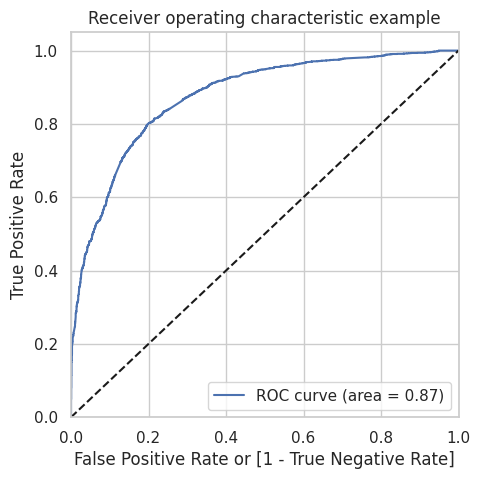

In [773]:
# call the ROC function
# Import the 'matplotlib'  to plot the ROC curve`
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [774]:
# Presently, the p-values and VIFs demonstrate satisfactory results across all variables, indicating no apparent issues. With confidence in the model's integrity, let's move forward and employ the 'predict' function to anticipate probabilities on the training set.

In [775]:
# create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.331916,0,1,1,1,1,0,0,0,0,0,0
1,0,0.094834,0,1,0,0,0,0,0,0,0,0,0
2,1,0.054817,0,1,0,0,0,0,0,0,0,0,0
3,1,0.362956,0,1,1,1,1,0,0,0,0,0,0
4,1,0.968938,1,1,1,1,1,1,1,1,1,1,1


In [776]:
# Create a df to see the values of sensitivity, accuracy & specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TN = confusion[0,0] # true negatives
# FN = confusion[1,0] # false negatives
# FP = confusion[0,1] # false positives
# TP = confusion[1,1] # true positive

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.585519  0.983713  0.215398
0.2   0.2  0.711724  0.951140  0.489187
0.3   0.3  0.770231  0.899023  0.650519
0.4   0.4  0.796234  0.817124  0.776817
0.5   0.5  0.796234  0.756166  0.833478
0.6   0.6  0.776508  0.657515  0.887111
0.7   0.7  0.748039  0.568637  0.914792
0.8   0.8  0.720018  0.465798  0.956315
0.9   0.9  0.662632  0.319218  0.981834


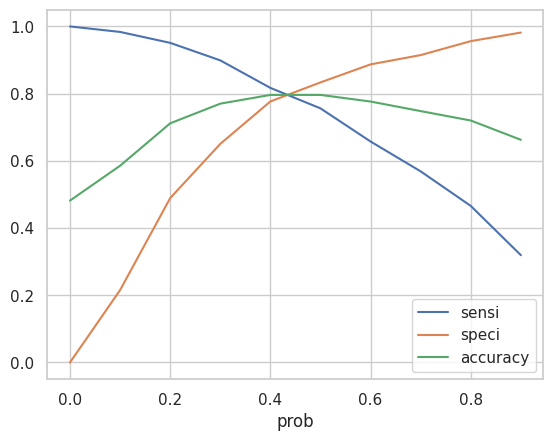

In [777]:
# Plot cutoff_df
cutoff_df.plot.line(x='prob', y=['sensi','speci','accuracy'])
plt.show()

In [778]:
# We can deduce that at approximately 0.42, we achieve optimal values for the three metrics. Consequently, we opt for 0.42 as our chosen cutoff threshold.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.331916,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.094834,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.054817,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.362956,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.968938,1,1,1,1,1,1,1,1,1,1,1,1


In [779]:
# Check the `accuracy` now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7978031831427931

In [780]:
# create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1826,  486],
       [ 416, 1733]])

In [781]:
# Let's evaluate the other metrics as well

FP = confusion2[0,1] # false positives
TP = confusion2[1,1] # true positive
FN = confusion2[1,0] # false negatives
TN = confusion2[0,0] # true negatives

In [782]:
# 'Sensitivity'
TP/(TP+FN)

0.8064215914378781

In [783]:
# 'Specificity'
TN/(TN+FP)

0.7897923875432526

In [784]:
# The chosen cutoff point appears to be suitable for our purpose
X_test.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,7.0,66,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,3.0,861,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,8.0,898,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4233,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3368,2.0,1602,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9091,9.0,924,3.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5972,2.0,70,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3631,5.0,1149,5.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

**Step 4: Make Predictions on the Test Set**

In [785]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [790]:
# Scale the test set using just 'transform'
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]] =  scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
# Select the columns in X_train for X_test
X_test = X_test[col]

In [791]:
X_test.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,0.000111,0.000013,0.027344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9202,0.000063,0.000183,0.015625,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6570,0.000048,0.000167,0.011719,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2668,0.000127,0.000174,0.015625,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4233,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3368,0.000032,0.000310,0.007812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9091,0.000143,0.000179,0.011719,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5972,0.000032,0.000014,0.007812,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3631,0.000079,0.000223,0.019531,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [792]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [793]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,1.0,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,1.0,0.000111,0.000013,0.027344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9202,1.0,0.000063,0.000183,0.015625,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6570,1.0,0.000048,0.000167,0.011719,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2668,1.0,0.000127,0.000174,0.015625,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.000048,0.000012,0.005859,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6583,1.0,0.000048,0.000067,0.011719,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5531,1.0,0.000222,0.000309,0.054688,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3056,1.0,0.000048,0.000184,0.011719,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [794]:
# Drop the required columns from X_test as well
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional',
                     'Last Notable Activity_Had a Phone Conversation'], 1,
                                inplace = True)

In [795]:
# Make predictions on the test set and store in 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [796]:
y_test_pred[:10]

4771    0.997049
6122    0.130752
9202    0.298902
6570    0.091807
2668    0.180464
4233    0.901840
3368    0.152972
9091    0.094250
5972    0.192430
3631    0.294341
dtype: float64

In [797]:
# Convert y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [798]:
# check y_pred_1 head
y_pred_1.head(10)

,0
4771,0.997049
6122,0.130752
9202,0.298902
6570,0.091807
2668,0.180464
4233,0.901840
3368,0.152972
9091,0.094250
5972,0.192430
3631,0.294341


In [799]:
# Convert y_test to df
y_test_df = pd.DataFrame(y_test)

In [800]:
# Remove index for both df to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [801]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [802]:
# Check 'y_pred_final'
y_pred_final.head(10)

,Converted,0
0,1,0.997049
1,0,0.130752
2,0,0.298902
3,1,0.091807
4,1,0.180464
5,1,0.901840
6,0,0.152972
7,1,0.094250
8,0,0.192430
9,1,0.294341


In [803]:
# Rename column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [804]:
#  y_pred_final head
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997049
1,0,0.130752
2,0,0.298902
3,1,0.091807
4,1,0.180464


In [805]:
# Make predictions on the test set using 0.45 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [806]:
# Check y_pred_final
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted
0,1,0.997049,1
1,0,0.130752,0
2,0,0.298902,0
3,1,0.091807,0
4,1,0.180464,0
5,1,0.901840,1
6,0,0.152972,0
7,1,0.094250,0
8,0,0.192430,0
9,1,0.294341,0


In [807]:
# check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6825313807531381

In [808]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[939,  57],
       [550, 366]])

In [809]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [810]:
# 'sensitivity'
TP / float(TP+FN)

0.39956331877729256

In [811]:
# 'specificity'
TN / float(TN+FP)

0.9427710843373494

In [812]:
# Build the training model using the precision-recall view

In [813]:
# Check at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1927,  385],
       [ 524, 1625]])

In [814]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8084577114427861

In [815]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7561656584457888

In [816]:
# Precision and recall tradeoff
# import the Precision recall curve library
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

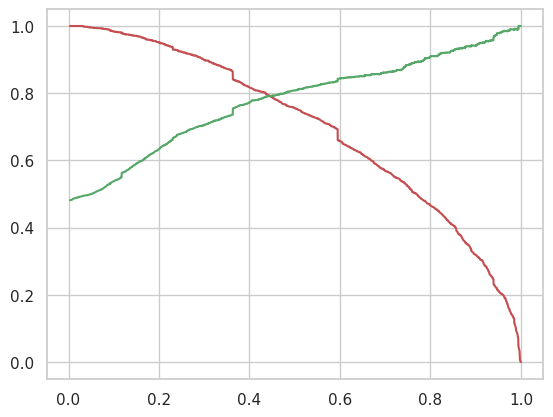

In [817]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, r[:-1], "r-")
plt.plot(thresholds, p[:-1], "g-")
plt.show()

In [818]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 0 if x < 0.44 else 1)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.331916,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.094834,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.054817,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.362956,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.968938,1,1,1,1,1,1,1,1,1,1,1,1


In [819]:
# check the `accuracy` now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8002689979825152

In [820]:
# Create the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1860,  452],
       [ 439, 1710]])

In [821]:
# evaluate the other metrics as well
FN = confusion2[1,0] # false negatives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
TP = confusion2[1,1] # true positive

In [822]:
# Precision
TP/(TP+FP)

0.7909343200740055

In [823]:
# Recall
TP/(TP+FN)

0.7957189390414147

In [824]:
# This cutoff point seems good to go!

**Step 5: Making Predictions on the Test Set**

In [825]:
# Make predictions on the test set & store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [826]:
y_test_pred[:10]

4771    0.997049
6122    0.130752
9202    0.298902
6570    0.091807
2668    0.180464
4233    0.901840
3368    0.152972
9091    0.094250
5972    0.192430
3631    0.294341
dtype: float64

In [827]:
# Convert y_pred to a df
y_pred_1 = pd.DataFrame(y_test_pred)

In [828]:
# y_pred_1 check head
y_pred_1.head(10)

,0
4771,0.997049
6122,0.130752
9202,0.298902
6570,0.091807
2668,0.180464
4233,0.901840
3368,0.152972
9091,0.094250
5972,0.192430
3631,0.294341


In [829]:
# convert y_test to df
y_test_df = pd.DataFrame(y_test)

In [830]:
# remove index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [831]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [832]:
# checking 'y_pred_final'
y_pred_final.head(10)

,Converted,0
0,1,0.997049
1,0,0.130752
2,0,0.298902
3,1,0.091807
4,1,0.180464
5,1,0.901840
6,0,0.152972
7,1,0.094250
8,0,0.192430
9,1,0.294341


In [833]:
# rename the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [834]:
# check y_pred_final head
y_pred_final.head(10)

,Converted,Conversion_Prob
0,1,0.997049
1,0,0.130752
2,0,0.298902
3,1,0.091807
4,1,0.180464
5,1,0.901840
6,0,0.152972
7,1,0.094250
8,0,0.192430
9,1,0.294341


In [835]:
# predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
# Check y_pred_final
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted
0,1,0.997049,1
1,0,0.130752,0
2,0,0.298902,0
3,1,0.091807,0
4,1,0.180464,0
5,1,0.901840,1
6,0,0.152972,0
7,1,0.094250,0
8,0,0.192430,0
9,1,0.294341,0


In [836]:
# check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6846234309623431

In [837]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[943,  53],
       [550, 366]])

In [838]:
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
TN = confusion2[0,0] # true negatives
TP = confusion2[1,1] # true positive

In [839]:
# Precision
TP/(TP+FP)

0.8735083532219571

In [840]:
#  Recall
TP/(TP+FN)

0.39956331877729256